<a href="https://colab.research.google.com/github/ParichayaHongthongkum/multivariate/blob/main/Chapter_5_Factor_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.datacamp.com/community/tutorials/introduction-factor-analysis

##Factor Analysis

In [236]:
import pandas as pd 

https://vincentarelbundock.github.io/Rdatasets/datasets.html

ข้อมูล psych 25 Personality items representing 5 factors (ลักษณะ บุคลิกภาพ )

In [237]:
BFI_data = pd.read_csv('bfi.csv')
BFI_data.head()

,Unnamed: 0,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,E1,E2,E3,E4,E5,N1,N2,N3,N4,N5,O1,O2,O3,O4,O5,gender,education,age
0,61617,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,4.0,3.0,3.0,3.0,4.0,4.0,3.0,4.0,2.0,2.0,3.0,3.0,6,3.0,4.0,3.0,1,NaN,16
1,61618,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,4.0,1.0,1.0,6.0,4.0,3.0,3.0,3.0,3.0,5.0,5.0,4.0,2,4.0,3.0,3.0,2,NaN,18
2,61620,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,5.0,2.0,4.0,4.0,4.0,5.0,4.0,5.0,4.0,2.0,3.0,4.0,2,5.0,5.0,2.0,2,NaN,17
3,61621,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,5.0,5.0,3.0,4.0,4.0,4.0,2.0,5.0,2.0,4.0,1.0,3.0,3,4.0,3.0,5.0,2,NaN,17
4,61622,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,2.0,2.0,2.0,5.0,4.0,5.0,2.0,3.0,4.0,4.0,3.0,3.0,3,4.0,3.0,3.0,1,NaN,17


Factor Analysis Assumption : สิ่งที่เก็บข้อมูลมาแบบ Observe Variable เพื่อไปเป็น Factor Analysis ที่มีตัวแปรอยู่เบื้องหลังของผลนั้น โดยจุดประสงค์คือเราต้องการหาตัวแปรเบื้องหลังที่มีอิทธิพลต่อ factor analysis

Factor Analysis'
Assumptions:
ในข้อมูล multivariate ที่มีตัวแปร Observe Variables จำนวน n ตัว

มีตัวแปร Factors (Latent Variables) จำนวน k ตัว ที่สามารถอธิบายข้อมูลทั้งหมดได้

โดย k < n

; k ที่น้อยกว่า n เพื่อทำให้เราสามารถลดตัวแปรที่ไม่จำเป็นออกได้

###Assumption ในการทำ Factor Analysis : 


1.   there are no outliers in data : ต้องไม่มี outliers เพื่อจะให้ค่าไม่ผิดเพี้ยนไป 
2.   Sample size should be greater than the factor : จำนวน data ต้องน้อยว่า จำนวน Factor Analysis
3.   There should not be prefact multicollonearity : เช่น การหา correlation จะได้เท่ากับ 1 หรือ plot กราฟจะได้เป็นเส้นตรง ต้องไม่มีค่าแบบนี้ 
4.   There should not be homoscedasticity : เช่น ตัวข้อมูลที่มีการกระจายคล้ายๆกัน เป็นกลุ่มที่อยู่ใกล้ๆกัน ความ error ของข้อมูลอยู่ในกรอบเดียวกัน ต้องไม่มีค่าแบบนี้ 

ซึ่งจาก Assumption เราสามารถใช้เครื่องมือในการทำได้เลย 


Factor Analysis มีประโยชน์หลักอยู่ 2 อันคือ 

1. Confirmatory : เช่น เราจัดกรุ๊ปข้อมูลไว้ แล้วเมื่อทำ fa แล้วกรุ๊ปยังอยู่แบบเดิม แสดงว่าสามารถยืนยันได้ว่า group ที่เราจัดนั้นเป็นจริง 
2. Exploratory : เป็นการหาตัวแปรที่ซ่อนอยู่ในชุดข้อมูล สามารถอธิบายอะไรได้บ้าง 

ที่ช่วยในการอธิบายทฤษฎี หรือสมมติฐานที่เราต้องการู้ได้ โดยดูจากความสัมพันธ์ของแต่ละตัวแปร ว่ามี factor ไหนอธิบายได้บ้าง 

In [238]:
!pip install factor_analyzer #ถ้าเกิดเราใช้ libary ที่ไม่ได้มีคนใช้บ่อย เราจะต้องทำการติดตั้งเอง
import matplotlib.pyplot as plt 

In [239]:
from factor_analyzer import FactorAnalyzer #เมื่อติดตั้งแล้วก็จะดึง มาใช้ได้ตามปกติ 

การ .drop เช่น df.drop(['gender', 'education', 'age'],axis=1,inplace=True) โดย inplace คือการอัพเดตข้อมูลลงไปเลย

## Quiz 5 ตัดตารางโดยใช้ .iloc 

In [240]:
BFI_data_dropped = BFI_data.iloc[:,1:-3] #.iloc[:,1:26] 
BFI_data_dropped

,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,E1,E2,E3,E4,E5,N1,N2,N3,N4,N5,O1,O2,O3,O4,O5
0,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,4.0,3.0,3.0,3.0,4.0,4.0,3.0,4.0,2.0,2.0,3.0,3.0,6,3.0,4.0,3.0
1,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,4.0,1.0,1.0,6.0,4.0,3.0,3.0,3.0,3.0,5.0,5.0,4.0,2,4.0,3.0,3.0
2,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,5.0,2.0,4.0,4.0,4.0,5.0,4.0,5.0,4.0,2.0,3.0,4.0,2,5.0,5.0,2.0
3,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,5.0,5.0,3.0,4.0,4.0,4.0,2.0,5.0,2.0,4.0,1.0,3.0,3,4.0,3.0,5.0
4,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,2.0,2.0,2.0,5.0,4.0,5.0,2.0,3.0,4.0,4.0,3.0,3.0,3,4.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2795,6.0,1.0,3.0,3.0,3.0,6.0,6.0,6.0,1.0,1.0,1.0,4.0,5.0,5.0,6.0,1.0,1.0,1.0,NaN,1.0,6.0,1,6.0,6.0,1.0
2796,2.0,4.0,4.0,3.0,5.0,2.0,3.0,4.0,4.0,3.0,2.0,2.0,4.0,4.0,3.0,NaN,3.0,2.0,3.0,3.0,6.0,3,5.0,4.0,2.0
2797,2.0,3.0,5.0,2.0,5.0,5.0,5.0,5.0,1.0,1.0,2.0,2.0,6.0,3.0,6.0,3.0,4.0,3.0,3.0,1.0,5.0,1,6.0,4.0,3.0
2798,5.0,2.0,2.0,4.0,4.0,5.0,5.0,5.0,2.0,6.0,2.0,2.0,4.0,5.0,4.0,5.0,5.0,6.0,4.0,1.0,5.0,2,5.0,5.0,1.0


1.   there are no outliers in data : ต้องไม่มี outliers เพื่อจะให้ค่าไม่ผิดเพี้ยนไป

เราจึงต้องเอาค่าว่างออกไป โดยการใช้ .dropna()

In [241]:
BFI_data_dropped2 = BFI_data_dropped.dropna()

In [242]:
BFI_data_dropped.shape

(2800, 25)

In [243]:
BFI_data_dropped2.shape

(2436, 25)

3.   There should not be prefact multicollonearity : เช่น การหา correlation จะได้เท่ากับ 1 หรือ plot กราฟจะได้เป็นเส้นตรง ต้องไม่มีค่าแบบนี้

###Bartlett’s test
pacget ที่เกี่ยวกับตัวสถิติ เพื่อให้ง่ายต่อการคำนวณ

In [244]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity #import fuction calculate_bartlett_sphericity เพื่อนำมาใช้ 

เราสามารถดูได้ว่า ถ้า p-value เท่ากับ 0 แสดงว่า data ที่เรามีไม่มี prefact multicollonearity

In [245]:
chi_square_value,p_value=calculate_bartlett_sphericity(BFI_data_dropped2)
chi_square_value, p_value #จะบอกค่าว่ามี chi_square เท่าไหร่ p_value

(18170.966350869243, 0.0)

4.   There should not be homoscedasticity : เช่น ตัวข้อมูลที่มีการกระจายคล้ายๆกัน เป็นกลุ่มที่อยู่ใกล้ๆกัน ความ error ของข้อมูลอยู่ในกรอบเดียวกัน ต้องไม่มีค่าแบบนี้

##Start Factors analysis

Choosing the Number of Factors 

###Import

In [246]:
from factor_analyzer import FactorAnalyzer

###Define 

In [247]:
fa = FactorAnalyzer(n_factors=20)

In [248]:
data_fa = fa.fit_transform(BFI_data_dropped2)
#fit คำนวนพารามิเตอร์ 
#tranfrom เป็นการนำ data ที่คำนวณมาแล้วเข้าไปใส่ในแกนที่ถูกเปลี่ยน

In [249]:
data_fa.shape

(2436, 20)

In [250]:
ev,v = fa.get_eigenvalues() #เพื่อนำไป plot ในกราฟ Scree plot

วิธีตัดสินว่าเราจะลดเหลือกี่ Dimention (มี factors ทั้งหมดกี่ตัว)

In [251]:
ev

array([5.13431118, 2.75188667, 2.14270195, 1.85232761, 1.54816285,
       1.07358247, 0.83953893, 0.79920618, 0.71898919, 0.68808879,
       0.67637336, 0.65179984, 0.62325295, 0.59656284, 0.56309083,
       0.54330533, 0.51451752, 0.49450315, 0.48263952, 0.448921  ,
       0.42336611, 0.40067145, 0.38780448, 0.38185679, 0.26253902])

Scree plot เป็นกราฟที่บอกว่า factor แต่ละตัวมี eigenvalues อยู่เท่าไหร่

โดยการทำ Scree plot เพื่อมาดู factor ที่มากว่า 1 แล้วจะนำ factor นั้นมาใช้

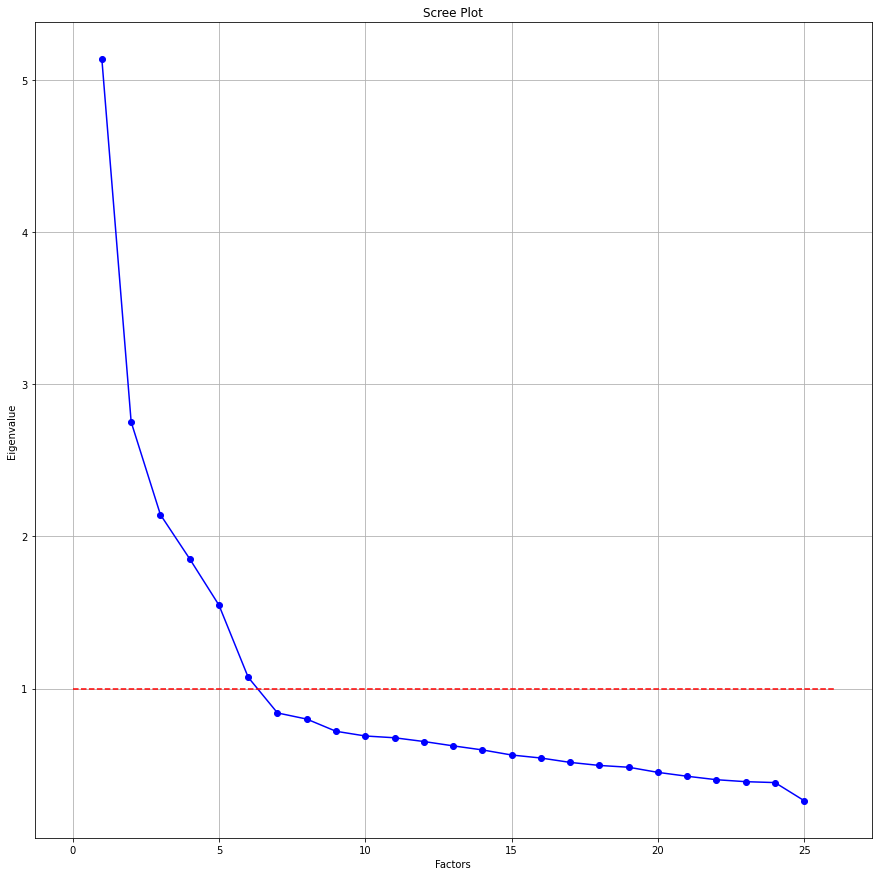

In [252]:
# Create scree plot using matplotlib
plt.plot(range(1,BFI_data_dropped2.shape[1]+1),ev,'bo-')
plt.plot([0,BFI_data_dropped2.shape[1]+1],[1,1],'r--')
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [253]:
data_fa[:,:6] #ที่เป็น 6 ตัวเพราะ ตัวที่ 1-6 มีค่ามากกว่า 1 

array([[-0.89749661, -0.12809666, -1.22649076,  1.08665889,  0.42476701,
         0.03981611],
       [ 0.33679356, -0.15018138, -0.04332274, -0.10339328,  0.29665648,
        -1.11019718],
       [-0.24521029,  0.80409961,  0.39343377, -0.30106518,  0.82703928,
        -0.2982022 ],
       ...,
       [ 0.38724631, -0.02183587,  1.19616826, -1.19357208,  0.79669501,
        -0.95295109],
       [-0.75695976,  0.94984758,  1.24363484, -1.15230215,  2.2534133 ,
        -1.0218667 ],
       [-2.35583952, -1.49829856,  0.49436981, -1.64734311,  0.94742323,
         0.43462495]])

##Factor Loading

In [254]:
fa.loadings_.shape

#เป็นการบอกว่ามีกี่ตัวแปร แล้วดูตัวแปรไหนมีอิทธิพลบ้าง

(25, 20)

In [255]:
from factor_analyzer import FactorAnalyzer
fa2 = FactorAnalyzer(n_factors=6)
data_fa2 = fa2.fit_transform(BFI_data_dropped2) 

ทำการ Plot factor loadings

In [256]:
from matplotlib import pyplot as plt
import numpy as np
import matplotlib

##matrix plot
confirmatory สามารถทำได้ดีเมื่อเรารู้ว่าตัวแปรไหนอยู่ในกลุ่มเดียวกันบ้าง

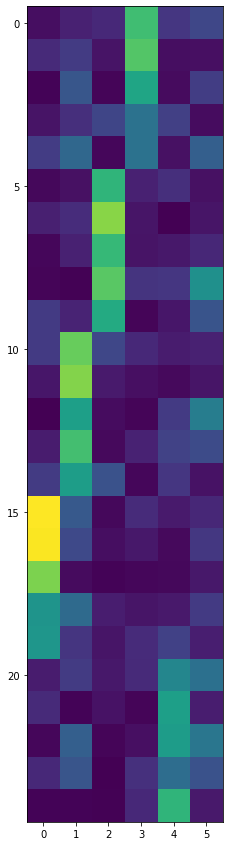

In [257]:
matplotlib.rcParams['figure.figsize']=[15,15]
plt.imshow(np.absolute(fa2.loadings_))

#กราฟนี้จะบอกว่า ค่าที่มีค่ามาก สีในกราฟก็จะสว่าง 
#โดยแกน y คือ factor ที่อธิบายค่าตัวที่ 1 ,2 ,3 ,... ไปเรื่อยๆ
#โดนแกน x คือ ข้อมูลตัวที่ 1 ,2 ,3 ,... ไปเรื่อยๆ
#ส่วนค่าในช่วงที่เป้นสีคือค่าของ factor loading 

Bar plot กราฟแท่ง
Exploratory สามารถทำได้ดีในตอนที่เราไม่รู้ว่าตัวแปรใดอยู่ในกลุ่มเดียวกันบ้าง

In [258]:
BFI_data_dropped2.columns #เรียกดู columns ก่อน 

Index(['A1', 'A2', 'A3', 'A4', 'A5', 'C1', 'C2', 'C3', 'C4', 'C5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'N1', 'N2', 'N3', 'N4', 'N5', 'O1', 'O2', 'O3', 'O4',
       'O5'],
      dtype='object')

เราเลือกมา 1 factor เพื่อนำค่าในกราฟข้างบนมา plot เป็น Bar เพื่อให้ดูค่าง่ายขึ้น

<BarContainer object of 25 artists>

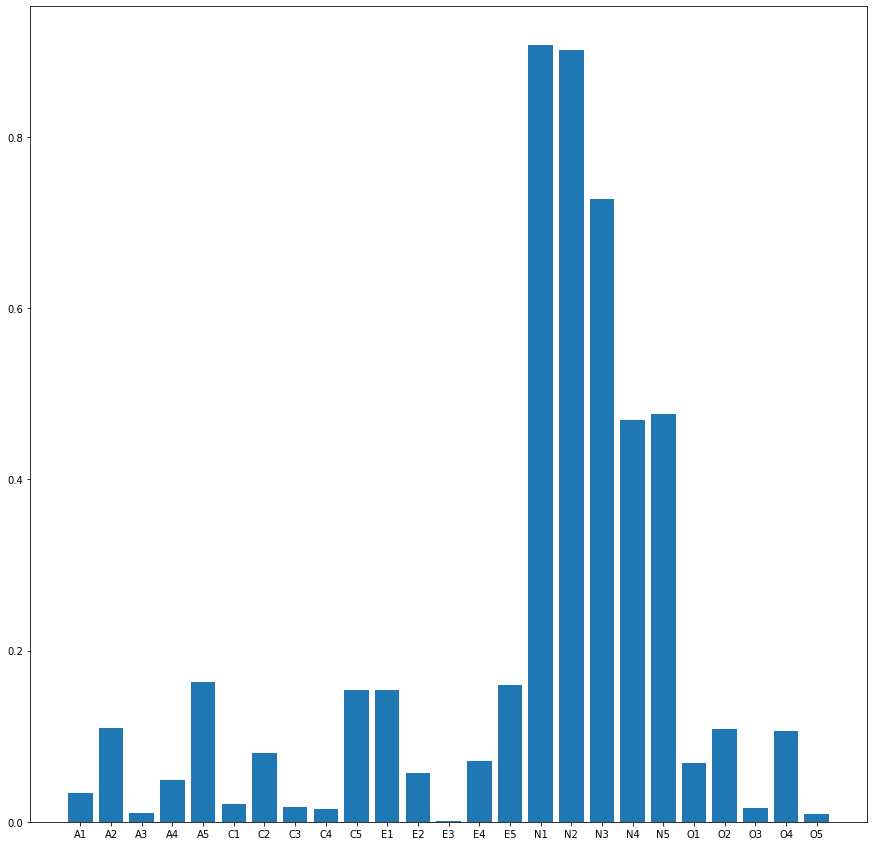

In [259]:
matplotlib.rcParams['figure.figsize']=[15,15]
plt.bar(range(25),np.absolute(fa2.loadings_[:,0]),tick_label=BFI_data_dropped2.columns) 
#range(25) ค่าของข้อมูลทั้งหมด 25 ตัว 
#เป็นการเอา columns แรกในทุกๆแถว นั้นก็คือ .loadings_[:,0] นั้นคือ factor 1 

##Exam 3

ทำ Factor Analysis ข้อมูล Fifa 2018 
https://drive.google.com/file/d/1UORRKWMb8GCN455eJE_n9MvBHupnSVwv/view?usp=sharing

**ทำการ Import ข้อมูล**

In [301]:
exam = pd.read_csv('FIFA_2018.csv')
exam

,Date,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,Offsides,Free Kicks,Saves,Pass Accuracy %,Passes,Distance Covered (Kms),Fouls Committed,Yellow Card,Yellow & Red,Red,Man of the Match,1st Goal,Round,PSO,Goals in PSO,Own goals,Own goal Time
0,14-06-2018,Russia,Saudi Arabia,5,40,13,7,3,3,6,3,11,0,78,306,118,22,0,0,0,Yes,12.0,Group Stage,No,0,NaN,NaN
1,14-06-2018,Saudi Arabia,Russia,0,60,6,0,3,3,2,1,25,2,86,511,105,10,0,0,0,No,NaN,Group Stage,No,0,NaN,NaN
2,15-06-2018,Egypt,Uruguay,0,43,8,3,3,2,0,1,7,3,78,395,112,12,2,0,0,No,NaN,Group Stage,No,0,NaN,NaN
3,15-06-2018,Uruguay,Egypt,1,57,14,4,6,4,5,1,13,3,86,589,111,6,0,0,0,Yes,89.0,Group Stage,No,0,NaN,NaN
4,15-06-2018,Morocco,Iran,0,64,13,3,6,4,5,0,14,2,86,433,101,22,1,0,0,No,NaN,Group Stage,No,0,1.0,90.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,11-07-2018,England,Croatia,1,46,11,1,6,4,4,3,24,5,79,479,148,14,1,0,0,No,5.0,Semi- Finals,No,0,NaN,NaN
124,14-07-2018,Belgium,England,2,43,12,4,3,5,4,1,5,5,88,510,108,11,1,0,0,Yes,4.0,3rd Place,No,0,NaN,NaN
125,14-07-2018,England,Belgium,0,57,15,5,7,3,5,0,12,2,92,698,110,5,2,0,0,No,NaN,3rd Place,No,0,NaN,NaN
126,15-07-2018,France,Croatia,4,39,8,6,1,1,2,1,14,1,75,271,99,14,2,0,0,Yes,18.0,Final,No,0,1.0,18.0


In [302]:
exam.shape

(128, 27)

In [303]:
exam_drop = exam.iloc[:,3:20]
exam_drop

,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,Offsides,Free Kicks,Saves,Pass Accuracy %,Passes,Distance Covered (Kms),Fouls Committed,Yellow Card,Yellow & Red,Red
0,5,40,13,7,3,3,6,3,11,0,78,306,118,22,0,0,0
1,0,60,6,0,3,3,2,1,25,2,86,511,105,10,0,0,0
2,0,43,8,3,3,2,0,1,7,3,78,395,112,12,2,0,0
3,1,57,14,4,6,4,5,1,13,3,86,589,111,6,0,0,0
4,0,64,13,3,6,4,5,0,14,2,86,433,101,22,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,1,46,11,1,6,4,4,3,24,5,79,479,148,14,1,0,0
124,2,43,12,4,3,5,4,1,5,5,88,510,108,11,1,0,0
125,0,57,15,5,7,3,5,0,12,2,92,698,110,5,2,0,0
126,4,39,8,6,1,1,2,1,14,1,75,271,99,14,2,0,0


ดูขนาดข้อมูล

In [304]:
exam_drop.shape

(128, 17)

ทำการใช้ Bartlett’s test

โดยถ้าค่า p value เข้าใกล้ 0 ถึงว่าดี

In [305]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

chi_square_value,p_value = calculate_bartlett_sphericity(exam_drop)

chi_square_value, p_value

(1299.3697851171412, 2.713580160466225e-189)

แปลผลจาก output ได้ว่า

ค่า P-value มีค่า 2.71 x 10^-189 ซึ่งมีค่าเข้าใกล้ 0 มาก

ทำการใช้ Kaiser-Meyer-Olkin (KMO) Test

ถ้าค่า KMO model มีค่ามากกว่า 0.6 แปลว่าข้อมูลเหมาะสมที่นำไปทำ Factor Analysis

In [306]:
from factor_analyzer.factor_analyzer import calculate_kmo

kmo_all,kmo_model=calculate_kmo(exam_drop)

kmo_model

0.5594556344508279

แปลผลจาก output ได้ว่า

ค่า P-value มีค่า 2.71 x 10^-189 ซึ่งมีค่าเข้าใกล้ 0 มาก

ทำการใช้ Kaiser-Meyer-Olkin (KMO) Test

ถ้าค่า KMO model มีค่ามากกว่า 0.6 แปลว่าข้อมูลเหมาะสมที่นำไปทำ Factor Analysis

In [267]:
from factor_analyzer.factor_analyzer import calculate_kmo

kmo_all,kmo_model=calculate_kmo(FIFA_data)

kmo_model

0.5770790223132766

แปลผลจาก Output ได้ว่า

ค่า KMO จาก model มีค่าประมาณ 0.56 หรือประมาณได้ 0.6 แปลว่าเหมาะสมที่นำไปทำ Factor Analysis

###ทำการ Factor Analysis

In [309]:
# IMPORT
from factor_analyzer import FactorAnalyzer

In [308]:
# DEFINE กำหนดขนาดที่เลือก
ex_fa = FactorAnalyzer(n_factors=11)

In [310]:
# Fit-transform
data_ex_fa = ex_fa.fit_transform(exam_drop)

In [311]:
# ตรวจสอบ ขนาดข้อมูล
data_ex_fa.shape

(128, 11)

ตัดสินว่าเราจะลดเหลือกี่ dimension โดยการใช้ eigen values

In [312]:
ev,v = ex_fa.get_eigenvalues()
ev

array([4.93533676, 1.66110682, 1.45898601, 1.31857945, 1.27991548,
       1.1607222 , 0.89822418, 0.80740568, 0.78874612, 0.65948826,
       0.56563441, 0.48116939, 0.38549929, 0.29659929, 0.22859409,
       0.06848785, 0.00550471])

**ทำการ scree plot** 


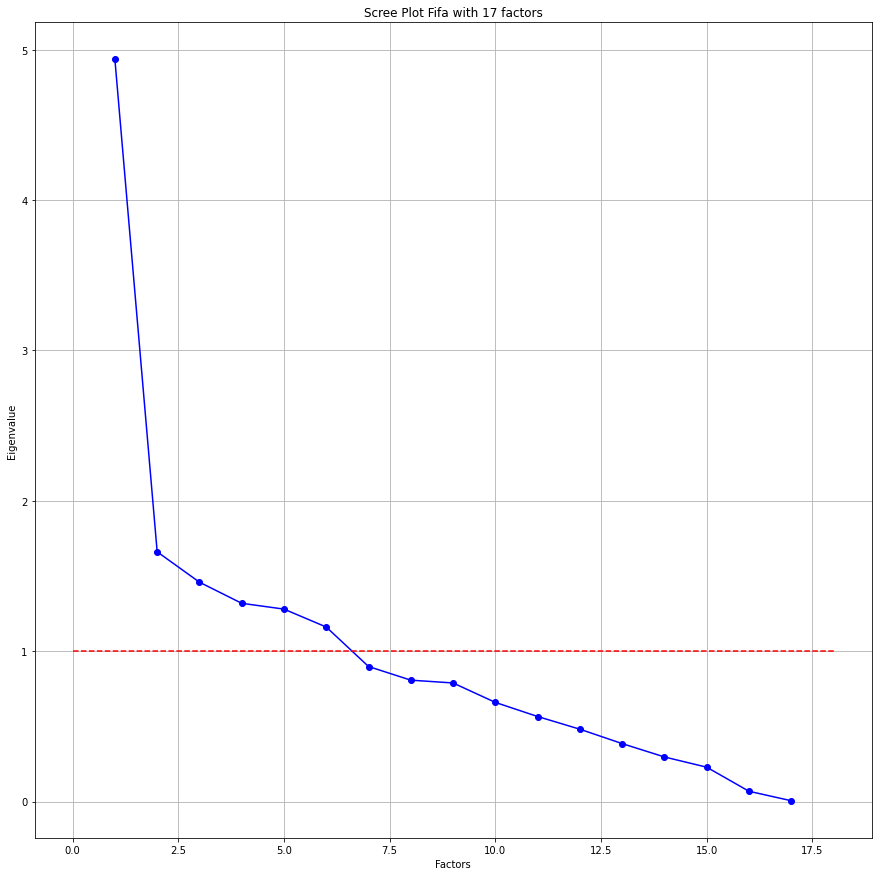

In [313]:
plt.plot(range(1,exam_drop.shape[1]+1),ev,'bo-')
plt.plot([0,exam_drop.shape[1]+1],[1,1],'r--')
plt.title('Scree Plot Fifa with 17 factors')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

จากข้อมูลจะเห็นได้ว่าจาก 17 factor มีตัวที่มีค่า factor มากกว่า 1 อยู่ 6 ตัว

In [314]:
data_ex_fa[:,:6]

array([[-1.11907117e+00,  9.66853807e-01,  2.38848913e+00,
         1.22865852e+00, -4.90448254e-01,  4.45640461e-01],
       [ 3.46387501e-01, -5.48473912e-02, -9.97785854e-01,
        -7.95329882e-01, -8.74599691e-01,  3.30918286e-01],
       [-8.78924200e-01,  6.27151862e-01, -5.76846303e-01,
        -6.89538363e-02, -7.92359466e-01, -2.90195491e-02],
       [ 5.89534809e-01,  4.66753901e-01, -1.22206159e-01,
        -1.55781099e+00,  3.31688552e-01,  8.16720059e-02],
       [ 7.20448563e-02, -5.27831560e-01, -1.68595850e-01,
         1.66025456e+00,  1.60813742e-01,  7.14872306e-02],
       [-1.85189668e+00, -1.13329407e-01, -1.08033774e-01,
         4.19657612e-01,  5.68703943e-02,  3.19178873e-02],
       [-7.09419653e-01, -2.68118220e-01,  4.09643496e-01,
        -1.74884486e-01, -1.24591975e+00,  5.25339632e-02],
       [ 1.62717074e+00, -2.45464024e-01,  7.78267546e-01,
        -7.19248371e-01, -4.74175002e-02,  3.66564307e-02],
       [ 1.80332681e-01, -2.64043832e-01,  6.484

Run Factor Analyzer อีกรอบ ด้วย paremeters จำนวน factor เท่ากับ 6

In [317]:
from factor_analyzer import FactorAnalyzer
ex_fa2 = FactorAnalyzer(n_factors=6)
data_ex_fa2 = ex_fa2.fit_transform(exam_drop)

In [316]:
ex_fa2.loadings_.shape

# เช็คขนาดของ ex_fa2 

(17, 6)

จากนั้นทำการ Plot factor loadings

In [318]:
from matplotlib import pyplot as plt
import numpy as np
import matplotlib

Matrix plot

(Confirmatory Factors Analysis หรือ วิเคราะห์องค์ประกอบเชิงยืนยัน)

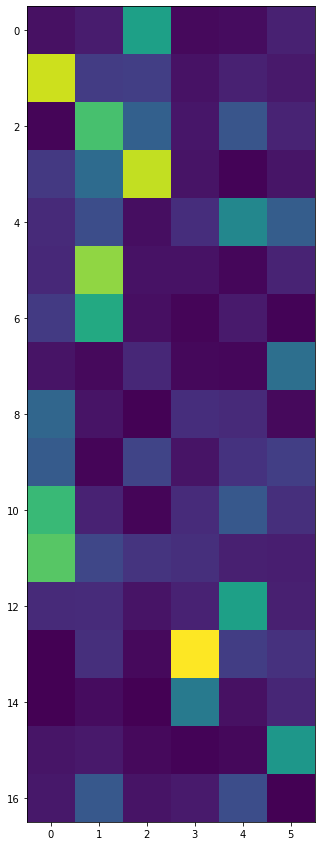

In [319]:
## Matrix plot
matplotlib.rcParams['figure.figsize']=[15,15]
plt.imshow(np.absolute(ex_fa2.loadings_))

จากนั้นทำกราฟแท่ง

(Exploratory Factors Analysis หรือ การวิเคราะห์องค์ประกอบเชิงสำรวจ)

In [320]:
exam_drop.columns
## ตรวจสอบชื่อทั้งหมด 17 Factors

Index(['Goal Scored', 'Ball Possession %', 'Attempts', 'On-Target',
       'Off-Target', 'Blocked', 'Corners', 'Offsides', 'Free Kicks', 'Saves',
       'Pass Accuracy %', 'Passes', 'Distance Covered (Kms)',
       'Fouls Committed', 'Yellow Card', 'Yellow & Red', 'Red'],
      dtype='object')

<BarContainer object of 17 artists>

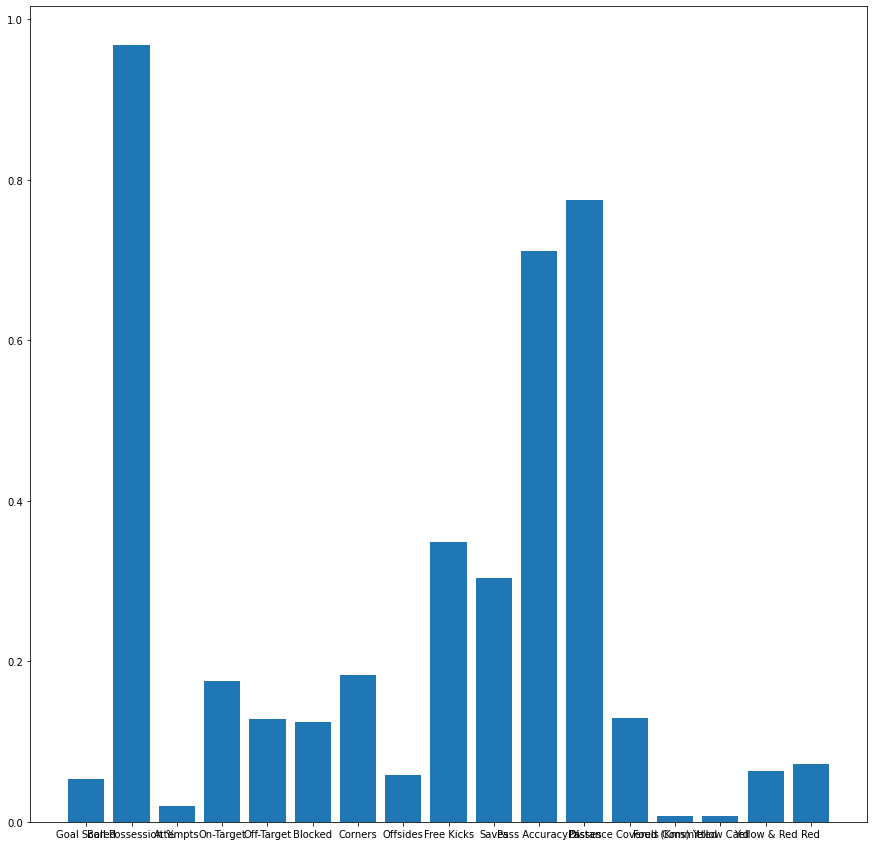

In [321]:
plt.bar(range(17),np.absolute(ex_fa2.loadings_[:,0]),tick_label=exam_drop.columns)

ในข้อมูล Fifa 2018 Statistics 

มีตัวแปร Factors จำนวน 6 ตัว ที่สามารถอธิบายข้อมูลทั้งหมดได้และสามารวิเคราะห์องค์ประกอบเชิงสำรวจ (Exporatory Factors Analysis) และ วิเคราะห์องค์ประกอบเชิงยืนยัน (Confirmatory Factors Analysis) ได้